In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import plotly.graph_objs as go 
import cufflinks as cf
import datetime


from chart_studio import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from pandas_datareader import data,wb

%matplotlib inline

Data Gathering

In [66]:
df = pd.read_csv(r".\Data\Classified Data", index_col=0)

In [67]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

Data Processing

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [69]:
df.describe()

WTT          PTI          EQW          SBI          LQE  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.949682     1.114303     0.834127     0.682099     1.032336   
std       0.289635     0.257085     0.291554     0.229645     0.243413   
min       0.174412     0.441398     0.170924     0.045027     0.315307   
25%       0.742358     0.942071     0.615451     0.515010     0.870855   
50%       0.940475     1.118486     0.813264     0.676835     1.035824   
75%       1.163295     1.307904     1.028340     0.834317     1.198270   
max       1.721779     1.833757     1.722725     1.634884     1.650050   

               QWG          FDJ          PJF          HQE          NXJ  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.943534     0.963422     1.071960     1.158251     1.362725   
std       0.256121     0.255118     0.288982     0.293738     0.204225   
min       0.262389     0.295228     0.299476     0.365157     0.639693   
25%       0.761064     0.784407     0.866306     0.934340     1.222623   
50%       0.941502     0.945333     1.065500     1.165556     1.375368   
75%       1.123060     1.134852     1.283156     1.383173     1.504832   
max       1.666902     1.713342     1.785420     1.885690     1.893950   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

In [70]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

Feature Selection

In [71]:
df.corr()

WTT       PTI       EQW       SBI       LQE       QWG  \
WTT           1.000000 -0.235255 -0.301018 -0.101517 -0.083401 -0.183628   
PTI          -0.235255  1.000000  0.271908  0.001580  0.097322  0.173701   
EQW          -0.301018  0.271908  1.000000 -0.040291  0.144539  0.182021   
SBI          -0.101517  0.001580 -0.040291  1.000000 -0.007983  0.022026   
LQE          -0.083401  0.097322  0.144539 -0.007983  1.000000  0.049944   
QWG          -0.183628  0.173701  0.182021  0.022026  0.049944  1.000000   
FDJ          -0.148100  0.095060  0.059533 -0.007666  0.035750  0.098062   
PJF          -0.330977  0.246387  0.323857  0.037767  0.083734  0.199189   
HQE           0.324981 -0.266242 -0.324656  0.078032 -0.143929 -0.181809   
NXJ          -0.073889  0.035834  0.126143  0.145045  0.044496  0.036078   
TARGET CLASS  0.551394 -0.468748 -0.598120  0.028874 -0.205043 -0.327664   

                   FDJ       PJF       HQE       NXJ  TARGET CLASS  
WTT          -0.148100 -0.330977  0.324981 -0.073889      0.551394  
PTI           0.095060  0.246387 -0.266242  0.035834     -0.468748  
EQW           0.059533  0.323857 -0.324656  0.126143     -0.598120  
SBI          -0.007666  0.037767  0.078032  0.145045      0.028874  
LQE           0.035750  0.083734 -0.143929  0.044496     -0.205043  
QWG           0.098062  0.199189 -0.181809  0.036078     -0.327664  
FDJ           1.000000  0.122888 -0.116969 -0.012923     -0.214885  
PJF           0.122888  1.000000 -0.363736  0.028012     -0.571483  
HQE          -0.116969 -0.363736  1.000000 -0.129283      0.643989  
NXJ          -0.012923  0.028012 -0.129283  1.000000     -0.111730  
TARGET CLASS -0.214885 -0.571483  0.643989 -0.111730      1.000000

<AxesSubplot:>

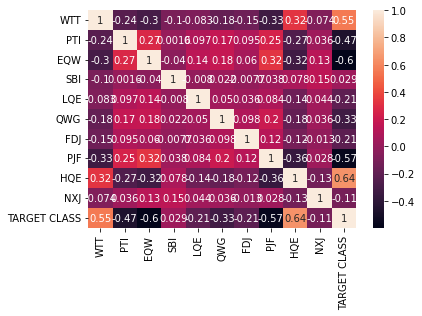

In [72]:
sns.heatmap(df.corr(), annot=True)

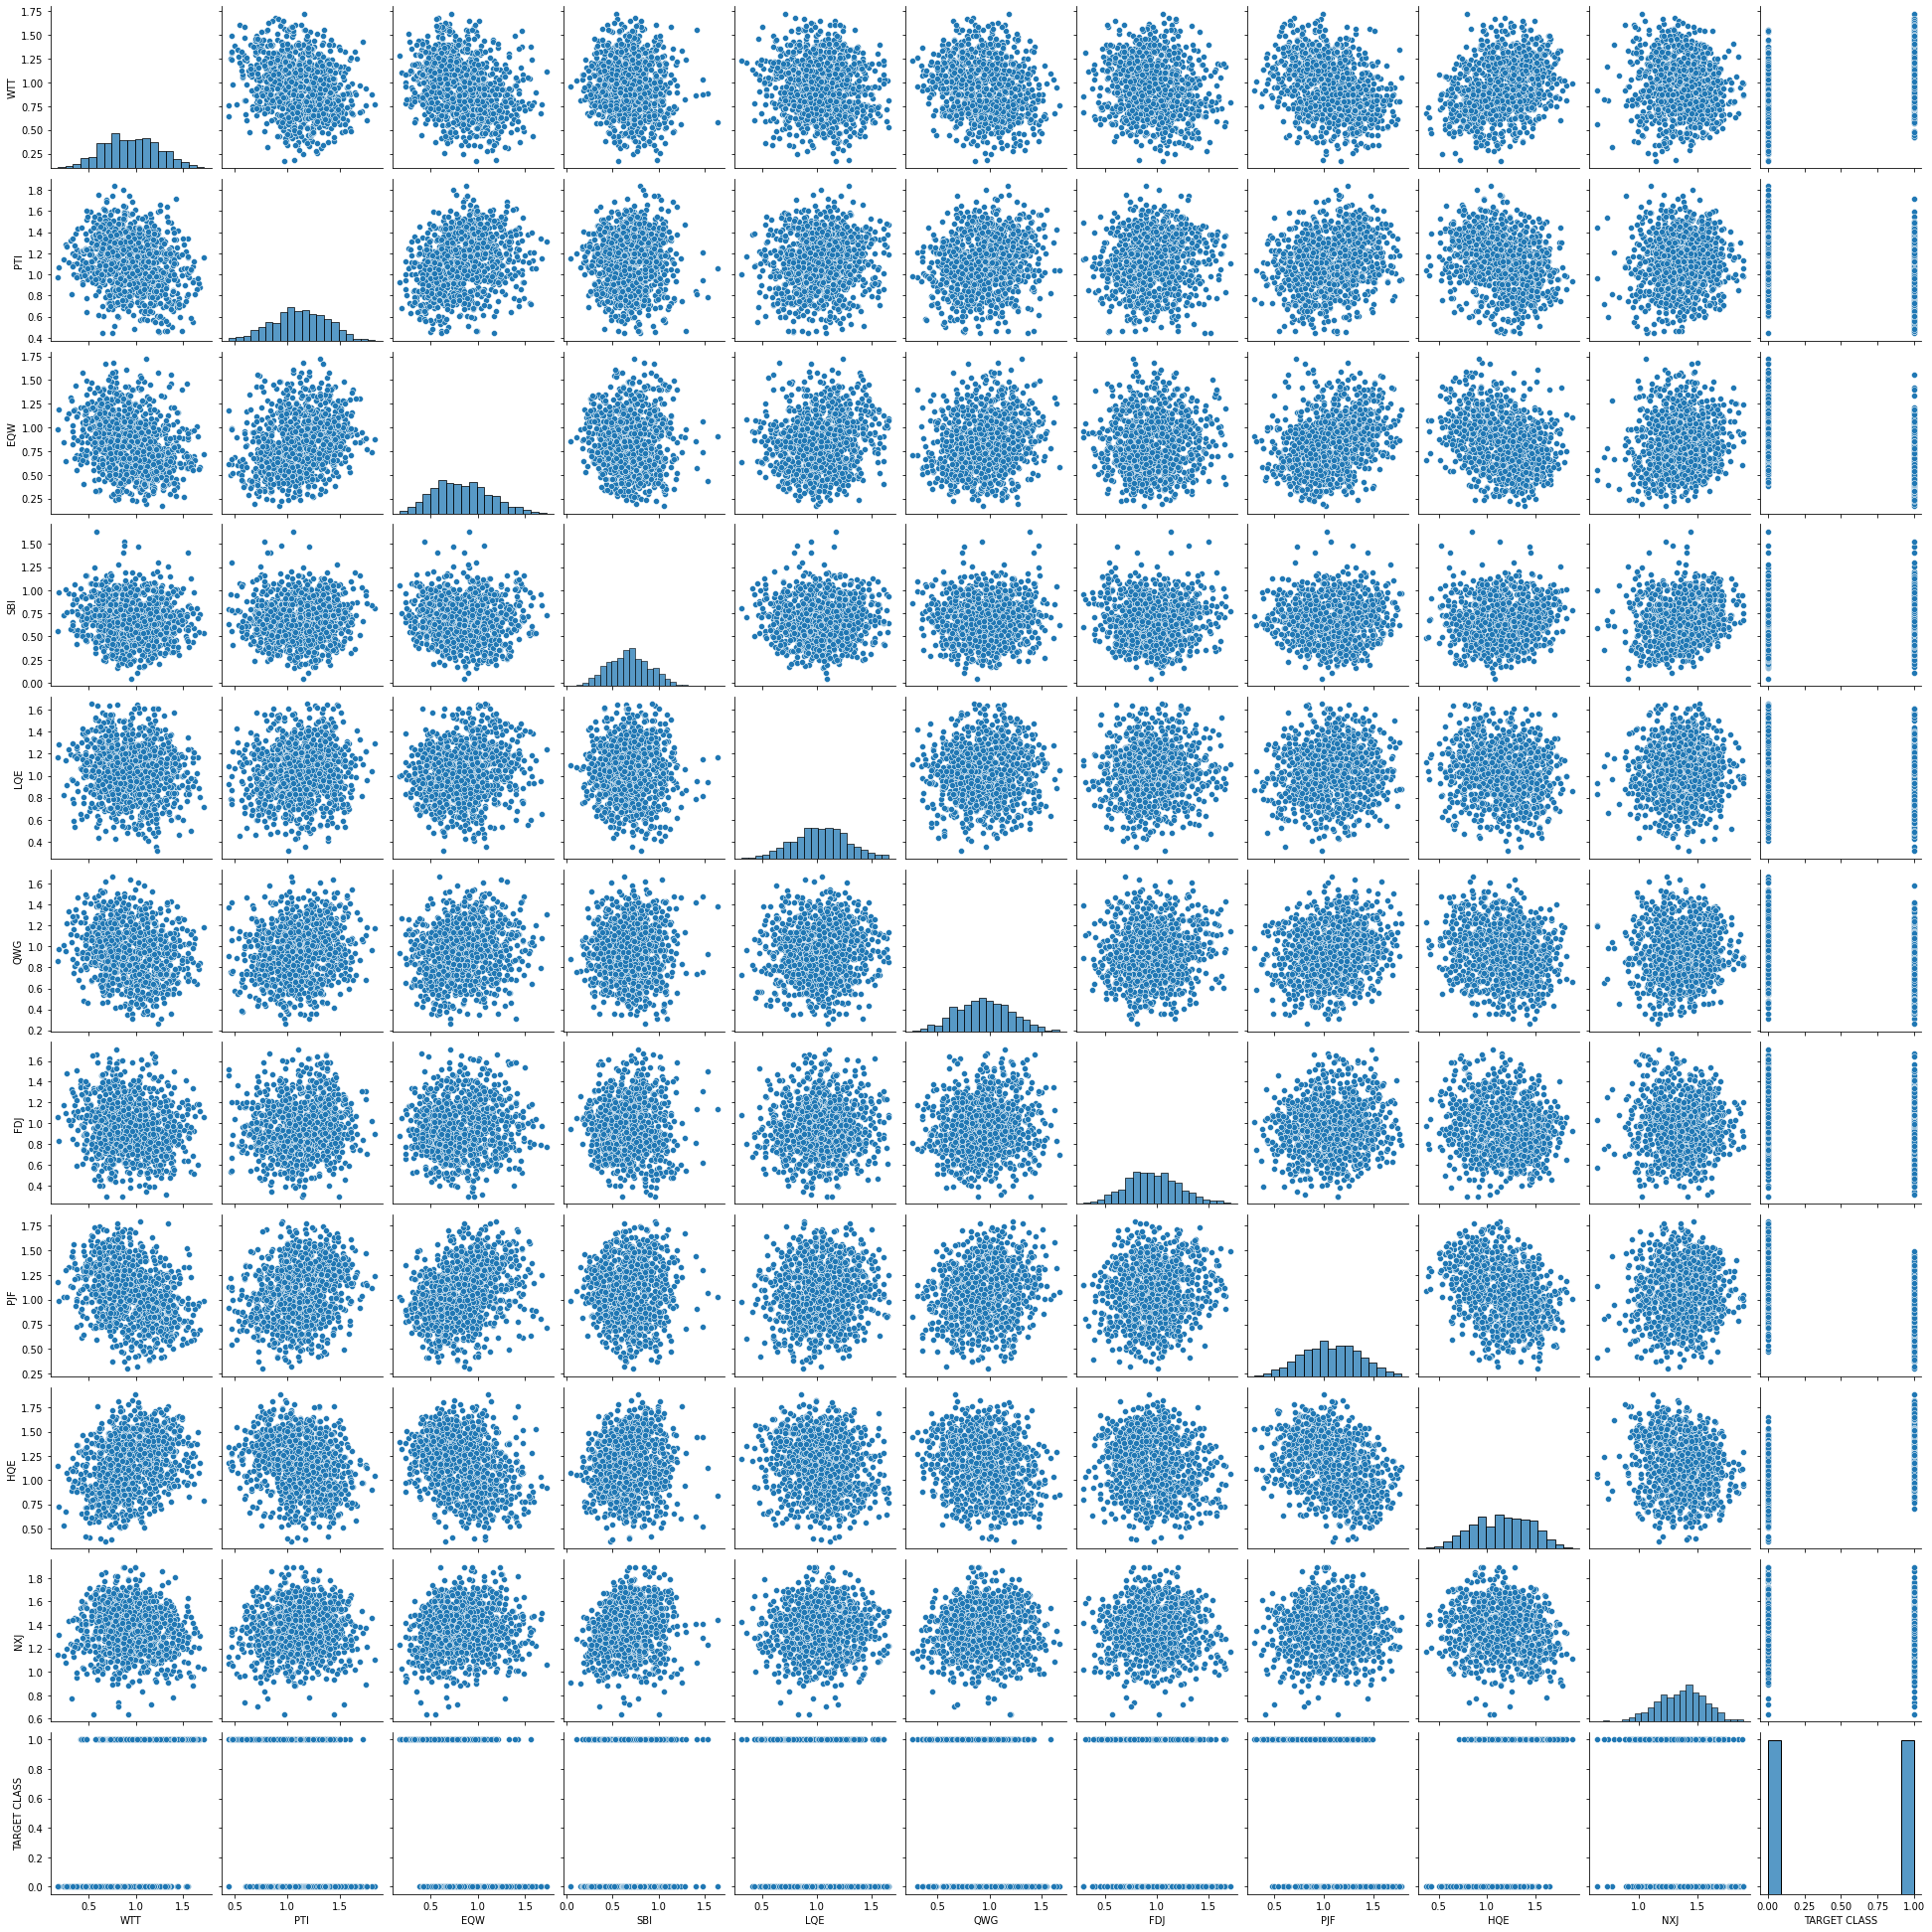

In [73]:
sns.pairplot(df)

In [74]:
feature = df.drop(columns=["TARGET CLASS"])
feature

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0    0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1    0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2    0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3    1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4    1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240  0.746811   
996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540  1.055928   
997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738  0.386802   
998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859  0.855806   
999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762  0.778234   

          PJF       HQE       NXJ  
0    0.643798  0.879422  1.231409  
1    1.013546  0.621552  1.492702  
2    1.154483  0.957877  1.285597  
3    1.380003  1.522692  1.153093  
4    0.646691  1.463812  1.419167  
..        ...       ...       ...  
995  0.319752  1.117340  1.348517  
996  0.713193  0.958684  1.663489  
997  0.389584  0.919191  1.385504  
998  1.061338  1.277456  1.188063  
999  0.907962  1.257190  1.364837  

[1000 rows x 10 columns]

In [75]:
target = df[["TARGET CLASS"]]
target

TARGET CLASS
0               1
1               0
2               0
3               1
4               1
..            ...
995             1
996             0
997             1
998             1
999             1

[1000 rows x 1 columns]

Spliting Data

In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target, test_size=0.3,random_state=101)

In [77]:
xtrain.shape,xtest.shape

((700, 10), (300, 10))

In [78]:
ytrain.shape,ytest.shape

((700, 1), (300, 1))

Modeling

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knm = KNeighborsClassifier(n_neighbors=1)
knm.fit(xtrain,ytrain.values.ravel())

KNeighborsClassifier(n_neighbors=1)

Predictions and Evaluations

In [80]:
Predictions = knm.predict(xtest)

Conclusions

In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,Predictions))
print(confusion_matrix(ytest,Predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       159
           1       0.93      0.91      0.92       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[150   9]
 [ 13 128]]


In [86]:
error_rate = []

for i in range(1,40):

    knm = KNeighborsClassifier(n_neighbors=i)
    knm.fit(xtrain,ytrain.values.ravel())
    pred_i = knm.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

In [84]:
plt.figure(figsize=(15,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title("Error Rate vs K Value")
plt.xlabel('K')
plt.ylabel("Error Rate")

In [ ]:
knm = KNeighborsClassifier(n_neighbors=17)
knm.fit(xtrain,ytrain.values.ravel())
pred = knm.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,pred))
print("\n")
print(classification_report(ytest,pred))

[[153   6]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.93      0.94       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

